# OpenCV
### Trabajamos con imágenes
Vamos a utilizar varias herramientas para crear visualizaciones. Comenzamos importando las bibliotecas que usaremos. 

In [ ]:
x=2
print(x)

2


In [2]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

Usaremos la primera herramienta para graficar una imagen. Simple, ¿no?

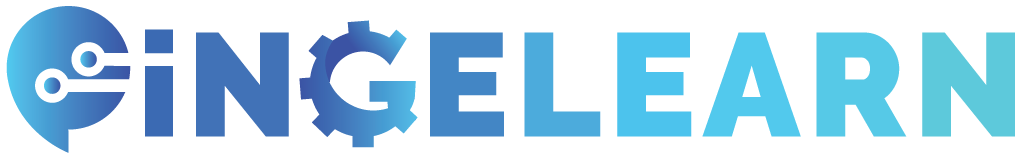

In [4]:
# Herramienta no.1: Ipython (Jupyter) Image
Image("Logo.png")

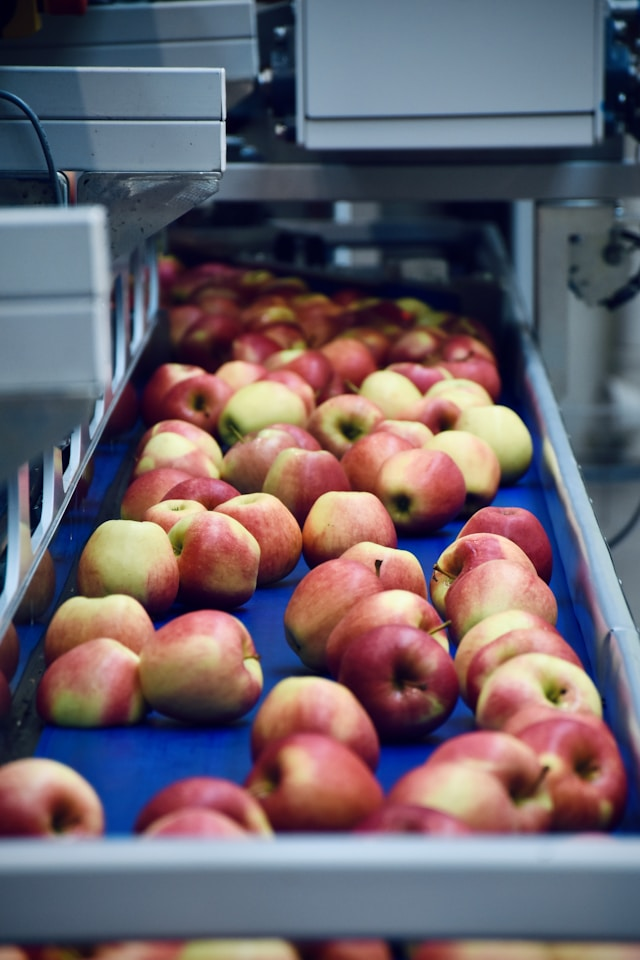

In [5]:
Image("manzanas.jpg")

Podemos usar el método _imread_ de OpenCV para leer una imagen.
imread tiene un argumento obligatorio (la ruta) y uno opcional (el formato)

El formato tiene tres opciones disponibles:

- cv2.IMREAD_GRAYSCALE o 0: Carga la imagen en formato "escala de grises"
- cv2.IMREAD_COLOR o 1: Carga una imagen a color, pero ignora cualquier transparencia. Es la opción por default.
- cv2.IMREAD_UNCHANGED o -1: Carga la imagen como tal, cargando el canal de transparencia como corresponde.

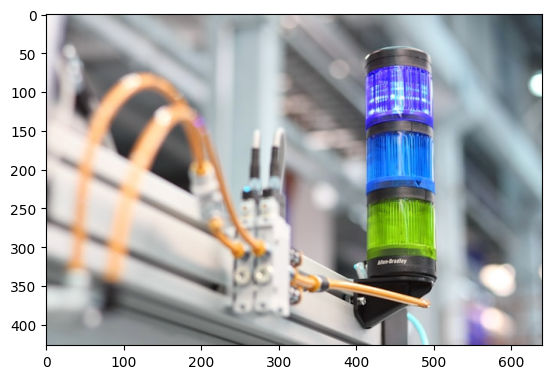

In [6]:
sem_img = cv2.imread("semaforo.jpg", cv2.IMREAD_COLOR)
plt.imshow(sem_img)

#### ¿Qué pasó?
El color es distinto, por que matplotlib espera la imagen en RGB (es decir, los canales Rojo, Verde y Azul en ese orden), pero OpenCV guarda las imágenes en formato BGR (Azul-Verde-Rojo). Por ésta razón, para poder "ver" el color real, tenemos que invertir los canales rojo y azul. 

Podemos usar también el método **cvtColor** para cambiar entre canales.

Siempre empieza con `cv2.COLOR_` y lo completamos con el origen, y el destino:  
Ejemplo: Si queremos pasar de BGR a RGB, hacemos  
`cv2.COLOR_BGR2RGB` --> de BGR a RGB **ó** BGR _to (2)_ RGB = `BGR2RGB`

In [ ]:
sem_img_rgb = cv2.cvtColor(sem_img, cv2.COLOR_BGR2RGB)
plt.imshow(sem_img_rgb)

### Canales de color
Cada imagen consta, según el formato, de varios canales. 
¡Veamos qué son los canales!

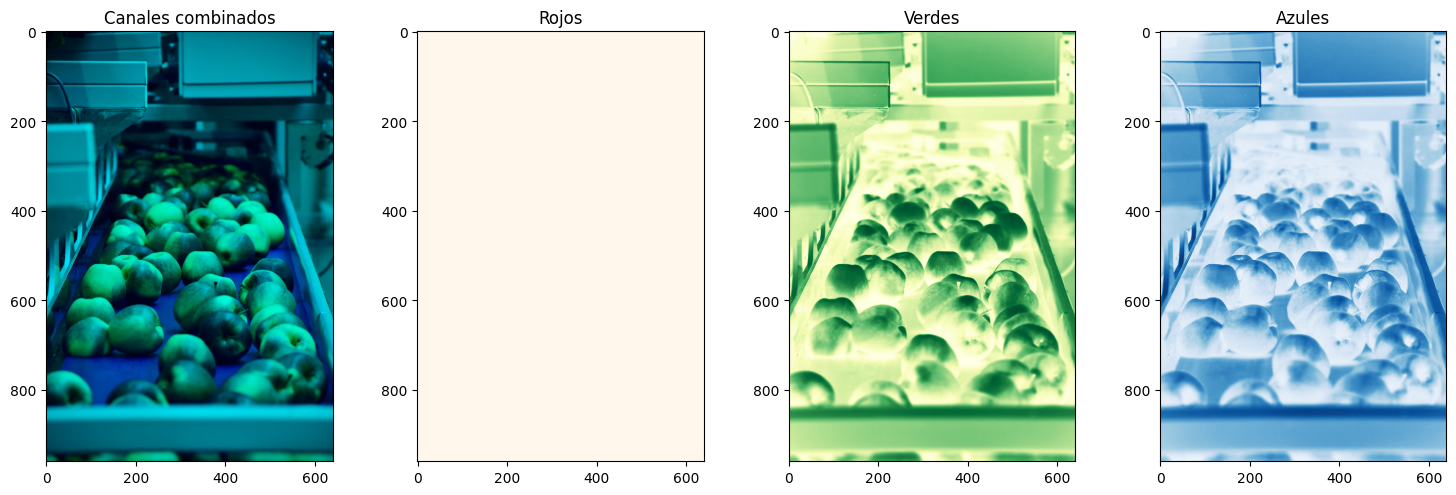

In [7]:
imagen_bgr = cv2.imread("manzanas.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(imagen_bgr)
r = r*0

# Mostramos los canales por separado
plt.figure(figsize=[15, 5])

plt.subplot(142)
plt.imshow(r, cmap="OrRd");plt.title("Rojos")
plt.subplot(143)
plt.imshow(g, cmap="YlGn");plt.title("Verdes")
plt.subplot(144)
plt.imshow(b, cmap="Blues");plt.title("Azules")

#Combinamos los tres canales nuevamente
imgCombinada = cv2.merge((b, g, r))
img_rgb = cv2.cvtColor(imgCombinada, cv2.COLOR_BGR2RGB)
# Combinamos y mostramos
plt.subplot(141)
plt.imshow(img_rgb)
plt.tight_layout()
plt.title("Canales combinados")
plt.show()

In [1]:
import cv2
import numpy as np
import random

# Crear una imagen en blanco
height, width = 400, 800
img = np.ones((height, width, 3), np.uint8) * 255

# Escribir el mensaje oculto en azul
mensaje = "dQw4w9WgXcQ"
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, mensaje, (50, 200), font, 3, (250, 255, 250), 10, cv2.LINE_AA)

# Añadir ruido en los canales rojo y verde
for i in range(height):
    for j in range(width):
        img[i, j, 1] += random.randint(0, 255)  # Canal verde
        img[i, j, 0] += random.randint(0, 255)  # Canal rojo

# Mostrar la imagen
"""
cv2.imshow('Imagen con mensaje oculto', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

# Guardar la imagen
cv2.imwrite('imagen_oculta_con_ruido.png', img)


/var/folders/h9/x448pwcd70z4q9cv4df7d9f80000gn/T/ipykernel_3405/2777296629.py:17: RuntimeWarning: overflow encountered in scalar add
  img[i, j, 1] += random.randint(0, 255)  # Canal verde
/var/folders/h9/x448pwcd70z4q9cv4df7d9f80000gn/T/ipykernel_3405/2777296629.py:18: RuntimeWarning: overflow encountered in scalar add
  img[i, j, 0] += random.randint(0, 255)  # Canal rojo


True